### Machine Learning Lab14 Exercise: Q-Learning with Taxi-v3 🚕

In this exercise, you should complete the Q-learning algorithm using the Taxi-v3 environment in the gym

In Taxi-v3 🚕, there are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

#### Step 0 Import the packages

In [1]:
import numpy as np
import gymnasium as gym
import random
import imageio
import tqdm
import matplotlib.pyplot as plt

####  Step 1 Create Taxi-v3 🚕  environment 
Using the API imported from gym

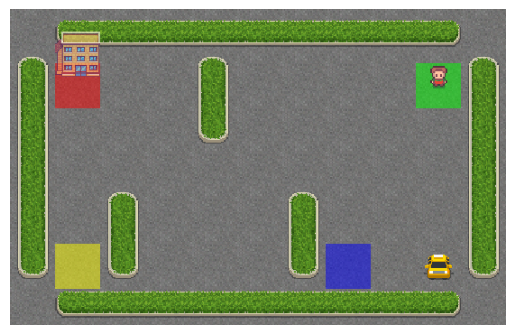

In [2]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset()
img = env.render()
fig = plt.figure('show picture')


# ax = fig.add_subplot(111)
# ax.imshow(img)
# ax.set_title("Taxi-v3")#给图片加titile

plt.imshow(img)
plt.axis('off') # 不显示刻度
# plt.title("Taxi-v3")

plt.show()

There are **500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger** (including the case when the passenger is in the taxi), and **4 destination locations.**


In [3]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

There are  500  possible states


In [4]:
action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  6  possible actions


The action space (the set of possible actions the agent can take) is discrete with **6 actions available 🎮**:
- 0: move south
- 1: move north
- 2: move east
- 3: move west
- 4: pickup passenger
- 5: drop off passenger

Reward function 💰:
- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

####  Step 2  Create the Q-table and initialize it

You can use the gym api to fetch the dimension of action space and state space

In [5]:
action_space = env.action_space.n
state_space = env.observation_space.n

# Please complete this initialization in this line
Q_table = np.zeros((state_space, action_space))

####  Step 3 Configure the hyperparameters

In [6]:
total_episodes = 100000        # 一共玩多少局游戏
total_test_episodes = 100     # 测试中一共走几步
max_steps = 99                # Max steps per episode 每一局游戏最多走几步

learning_rate = 0.5           # Learning rate
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability 
decay_rate = 0.008            # Exponential decay rate for exploration prob


test_seed = [16,54,165,177,191,191,120,80,149,178,48,38,6,125,174,73,50,172,100,148,146,6,25,40,68,148,49,167,9,97,164,176,61,7,54,55,
 161,131,184,51,170,12,120,113,95,126,51,98,36,135,54,82,45,95,89,59,95,124,9,113,58,85,51,134,121,169,105,21,30,11,50,65,12,43,82,145,152,97,106,55,31,85,38,
 112,102,168,123,97,21,83,158,26,80,63,5,81,32,11,28,148] # Evaluation seed, this ensures that all classmates agents are trained on the same taxi starting position
    

####  Step 4 Q Learning algorithm

In [7]:
def epsilon_greedy_policy(env, Qtable, state, epsilon):
  # Randomly generate a number between 0 and 1
  random_int = random.uniform(0,1)
  # if random_int > greater than epsilon --> exploitation
  if random_int > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = np.argmax(Qtable[state])
  # else --> exploration
  else:
    action = env.action_space.sample()
  
  return action

In [8]:
bar = tqdm.tqdm(total=total_episodes)
sample_rewards = []
for episode in range(total_episodes):
    state, _= env.reset()
    step=0
    done=False
    sample_reward = 0 
    for step in range(max_steps):
        action = epsilon_greedy_policy(env,Q_table,state,epsilon)
        
        tmp = env.step(action)
        new_state, reward, done, truncated, info = tmp
        # Calculate the reward of this episode
        sample_reward += reward
        
        # Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]\
        Q_table[state][action] = Q_table[state][action] + learning_rate * (reward + gamma * np.max(Q_table[new_state]) - Q_table[state][action]) 
        
        # Update the state
        state = new_state
        
        #store the episode reward
        if done == True:
            sample_rewards.append(sample_reward)
            break
    # Reduced exploration probability (due to decreasing uncertainty)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)         
    # print the average reward over 1000 episodes
    if episode%1000 == 0:
        mean_reward = np.mean(sample_rewards)
        sample_rewards = []
        #print(str(episode)+": average reward:" + str(mean_reward))
        bar.set_description(str(episode)+": average reward:" + str(mean_reward))
    bar.update()

  0%|          | 0/100000 [00:00<?, ?it/s]d:\Anaconda3\envs\CS329\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda3\envs\CS329\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
99000: average reward:5.196: 100%|█████████▉| 99705/100000 [00:20<00:00, 4881.56it/s]           

####  Step 5 Model evaluation

In [11]:
fps=5
bar = tqdm.tqdm(total=total_test_episodes)
env.reset()
rewards=[]
images = [] 
for episode in range(total_test_episodes):
    state, _ = env.reset(seed=test_seed[episode])
    step = 0
    done =False
    total_rewards = 0

    for step in range(max_steps):
        img = env.render()
        images.append(img)
        #TODO:action selection
        action = np.argmax(Q_table[state][:])
        #TODO:fetech the new state and reward by gym API
        new_state, reward, done, truncated, info = env.step(action)
        
        total_rewards += reward
        if done:
            rewards.append(total_rewards)
            break
        state = new_state
     
env.close()
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")
imageio.mimsave('taxi-v3.gif', [np.array(img) for i, img in enumerate(images)], fps=fps)


  0%|          | 0/100 [02:03<?, ?it/s]


Mean_reward=7.56 +/- 2.71


####  Step 6 Visualizing the results

In [ ]:
from IPython.display import Image
Image('taxi-v3.gif')